<a href="https://colab.research.google.com/github/tigerjk726/Bumjoong/blob/main/Typhoon_modeling_Korea_20221216(78%2C910)_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT DATA

In [1]:
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')             

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
%cd /content/drive/My Drive/Colab Notebooks/2022.10.10 typhoon

/content/drive/My Drive/Colab Notebooks/2022.10.10 typhoon


In [4]:
df = pd.read_csv('19592021korea(2).csv')

칼럼별 명칭

In [5]:
df.columns

Index(['year', 'mon', 'amo', 'aao', 'ao', 'emi', 'gmo', 'nino3', 'nino4',
       'pdo', 'pna', 'qbo', 'freq', 'inten'],
      dtype='object')

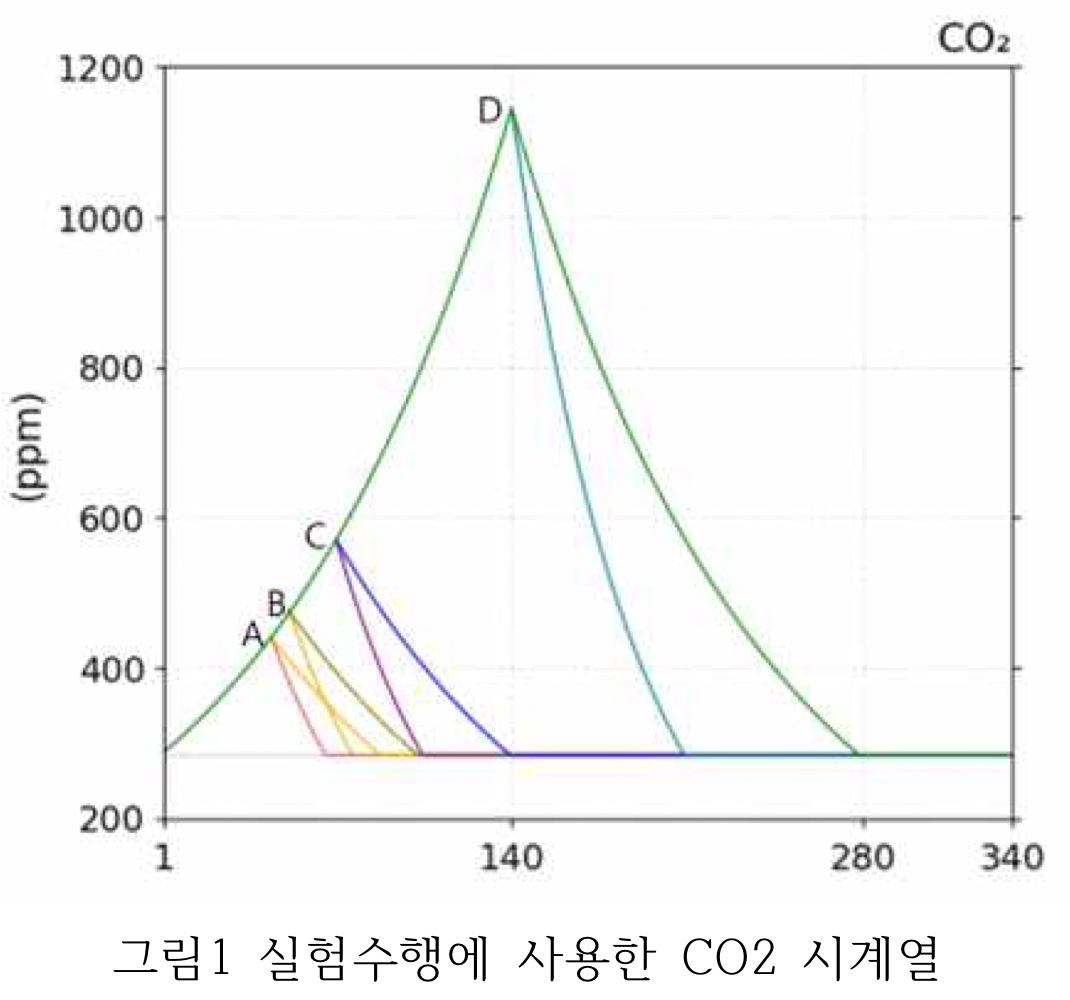

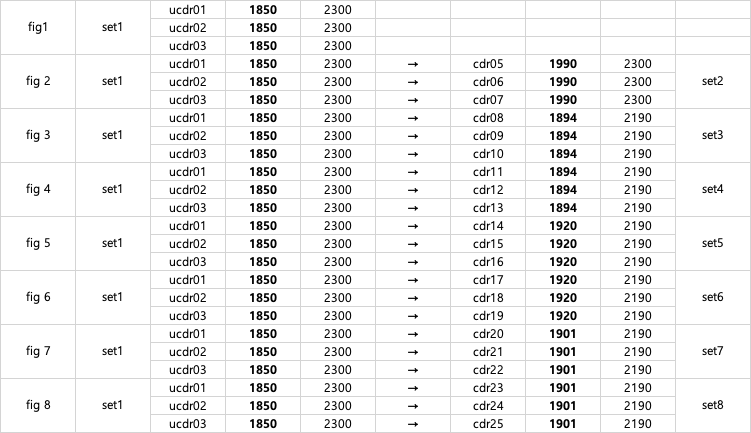

# Data Splitting


In [6]:
df = df[df["year"].isin(list(range(1979,2021,1)))]

In [7]:
x = df.iloc[:,2:12]
y1 = df.iloc[:,12:13]
y2 = df.iloc[:,13:]

#Modelling


In [8]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from statistics import mean

In [9]:
cv = LeaveOneOut()

model5 = RandomForestClassifier()
rmse5= np.sqrt(-cross_val_score(model5, x, y1, scoring="neg_mean_squared_error", cv = cv))
model5.fit(x, y1)

RandomForestClassifier()

In [10]:
df["yearmon"] = df["year"].apply(str) + ' ' + df["mon"].apply(str)

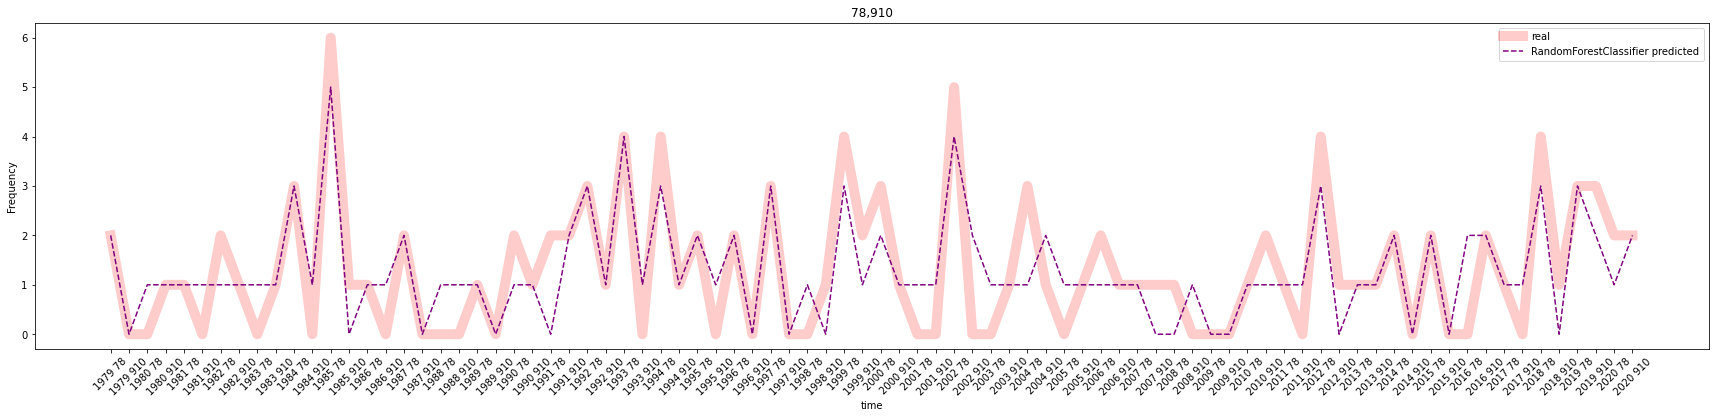

             0      freq
0     1.000000  0.800676
freq  0.800676  1.000000 
 0    1.285714
dtype: float64


In [11]:
rmse5 = pd.DataFrame(rmse5)
rmse5 = rmse5.set_index(df["yearmon"])
y1 = y1.set_index(df["yearmon"])
plt.figure(figsize=(30, 6))  
plt.plot(y1, color='red', label='real', alpha=0.2, linewidth = 10)
plt.plot(rmse5, color='purple',linestyle = '--', label='RandomForestClassifier predicted')
plt.title('78,910')
plt.xlabel('time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Corr1 = pd.merge(rmse5, y1, on='yearmon')

print(Corr1.corr(),"\n",rmse5.mean())

# Hist / 585 (1850 ~ 2014, 2015 ~ 2099)

In [12]:
%cd /content/drive/My Drive/Colab Notebooks/2022.10.10 typhoon/future
df1 = pd.read_csv('hist585.csv')

/content/drive/My Drive/Colab Notebooks/2022.10.10 typhoon/future


In [13]:
df1 = df1[df1["mon"].isin([7,8,9,10])]
df2 = df1[df1["mon"].isin([7,8])]
df3 = df1[df1["mon"].isin([9,10])]

In [14]:
df2 = df2.groupby(['year'], as_index=False).mean()
df3 = df3.groupby(['year'], as_index=False).mean()

In [15]:
df4 = pd.concat([df2,df3])
df4 = df4.sort_values(by=['year'],ascending = True)
X = df4.iloc[:,2:12]

In [16]:
Y = model5.predict(X)

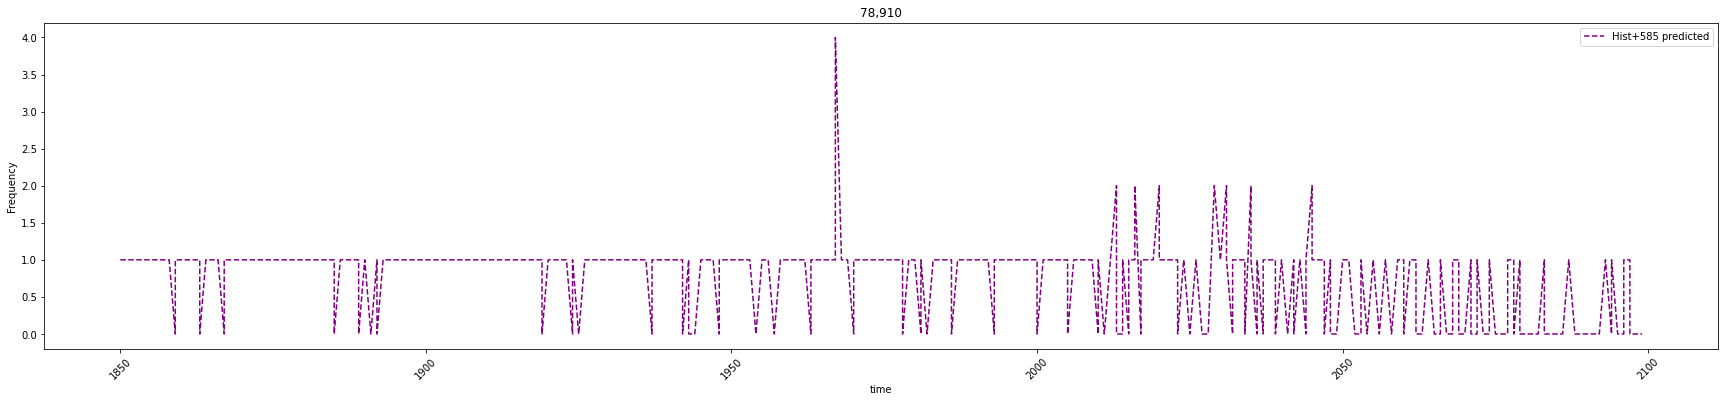

In [17]:
cv = LeaveOneOut()

Y = pd.DataFrame(Y)
Y = Y.set_index(df4["year"])
plt.figure(figsize=(30, 6))  
plt.plot(Y, color='purple',linestyle = '--', label='Hist+585 predicted')
plt.title('78,910')
plt.xlabel('time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Fig1 - ucdr01, ucdr02, ucdr03

In [18]:
df5 = pd.read_csv('ucdr01.csv')
df6 = pd.read_csv('ucdr02.csv')
df7 = pd.read_csv('ucdr03.csv')

In [19]:
df5 = df5[df5["mon"].isin([7,8,9,10])]
df5a = df5[df5["mon"].isin([7,8])]
df5b = df5[df5["mon"].isin([9,10])]
df5a = df5a.groupby(['year'], as_index=False).mean()
df5b = df5b.groupby(['year'], as_index=False).mean()
df5c = pd.concat([df5a,df5b])
df5c = df5c.sort_values(by=['year'],ascending = True)
X1 = df5c.iloc[:,2:12]

In [20]:
df6 = df6[df6["mon"].isin([7,8,9,10])]
df6a = df6[df6["mon"].isin([7,8])]
df6b = df6[df6["mon"].isin([9,10])]
df6a = df6a.groupby(['year'], as_index=False).mean()
df6b = df6b.groupby(['year'], as_index=False).mean()
df6c = pd.concat([df6a,df6b])
df6c = df6c.sort_values(by=['year'],ascending = True)
X2 = df6c.iloc[:,2:12]

In [21]:
df7 = df7[df7["mon"].isin([7,8,9,10])]
df7a = df7[df7["mon"].isin([7,8])]
df7b = df7[df7["mon"].isin([9,10])]
df7a = df7a.groupby(['year'], as_index=False).mean()
df7b = df7b.groupby(['year'], as_index=False).mean()
df7c = pd.concat([df7a,df7b])
df7c = df7c.sort_values(by=['year'],ascending = True)
X3 = df7c.iloc[:,2:12]

In [22]:
Y1 = model5.predict(X1)
Y2 = model5.predict(X2)
Y3 = model5.predict(X3)

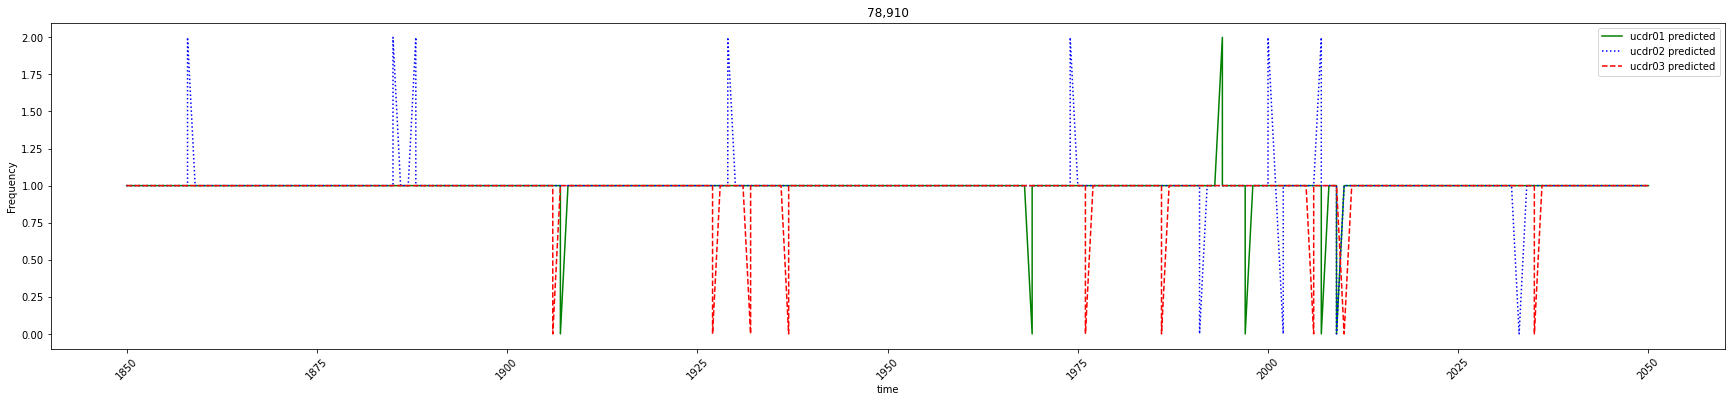

In [23]:
Y1 = pd.DataFrame(Y1)
Y1 = Y1.set_index(df5c["year"])
Y1a = Y1.iloc[range(0,401)]
Y1b = Y1.iloc[range(401,902)]

Y2 = pd.DataFrame(Y2)
Y2 = Y2.set_index(df6c["year"])
Y2a = Y2.iloc[range(0,401)]
Y2b = Y2.iloc[range(401,902)]

Y3 = pd.DataFrame(Y3)
Y3 = Y3.set_index(df7c["year"])
Y3a = Y3.iloc[range(0,401)]
Y3b = Y3.iloc[range(401,902)]

plt.figure(figsize=(30, 6))  

plt.plot(Y1a, color='green',linestyle = '-', label='ucdr01 predicted')
plt.plot(Y2a, color='blue',linestyle = ':', label='ucdr02 predicted')
plt.plot(Y3a, color='red',linestyle = '--', label='ucdr03 predicted')

plt.title('78,910')
plt.xlabel('time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()

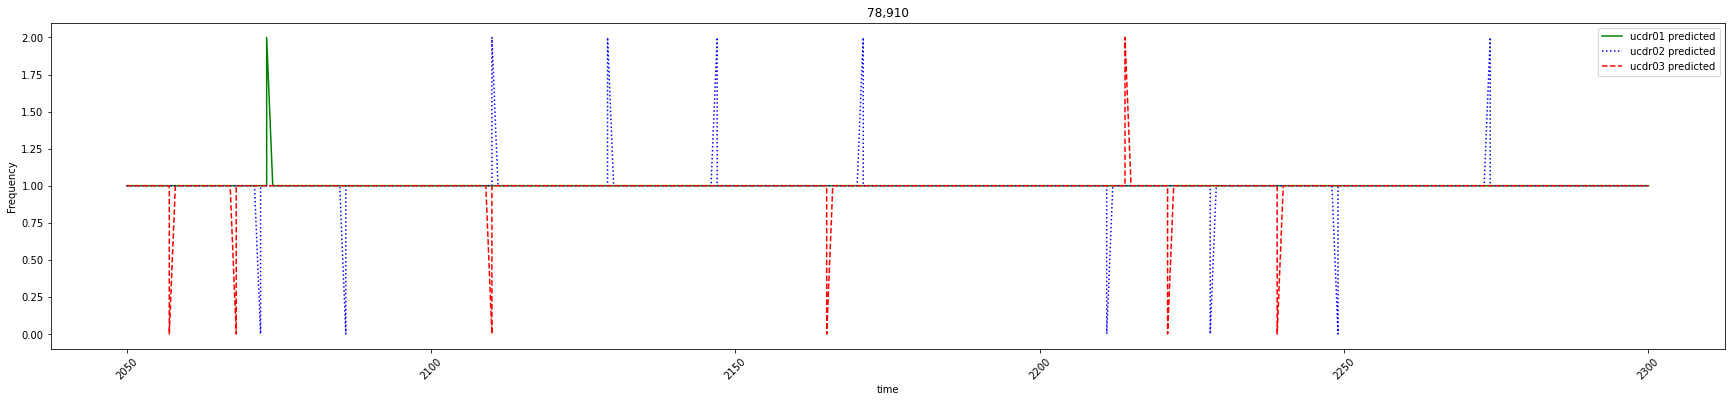

In [24]:
plt.figure(figsize=(30, 6))  

plt.plot(Y1b, color='green',linestyle = '-', label='ucdr01 predicted')
plt.plot(Y2b, color='blue',linestyle = ':', label='ucdr02 predicted')
plt.plot(Y3b, color='red',linestyle = '--', label='ucdr03 predicted')

plt.title('78,910')
plt.xlabel('time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()

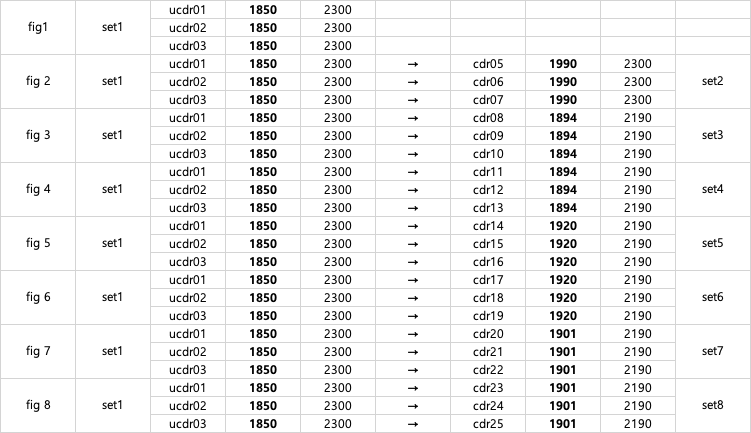

# Fig2 - ucdr01 + cdr05, ucdr02 + cdr06, ucdr03 + cdr07

In [25]:
df8 = pd.read_csv('cdr05.csv')
df9 = pd.read_csv('cdr06.csv')
df10 = pd.read_csv('cdr07.csv')

df8 = df8[df8["mon"].isin([7,8,9,10])]
df8a = df8[df8["mon"].isin([7,8])]
df8b = df8[df8["mon"].isin([9,10])]
df8a = df8a.groupby(['year'], as_index=False).mean()
df8b = df8b.groupby(['year'], as_index=False).mean()
df8c = pd.concat([df8a,df8b])
df8c = df8c.sort_values(by=['year'],ascending = True)

In [26]:
df9 = df9[df9["mon"].isin([7,8,9,10])]
df9a = df9[df9["mon"].isin([7,8])]
df9b = df9[df9["mon"].isin([9,10])]
df9a = df9a.groupby(['year'], as_index=False).mean()
df9b = df9b.groupby(['year'], as_index=False).mean()
df9c = pd.concat([df9a,df9b])
df9c = df9c.sort_values(by=['year'],ascending = True)

In [27]:
df10 = df10[df10["mon"].isin([7,8,9,10])]
df10a = df10[df10["mon"].isin([7,8])]
df10b = df10[df10["mon"].isin([9,10])]
df10a = df10a.groupby(['year'], as_index=False).mean()
df10b = df10b.groupby(['year'], as_index=False).mean()
df10c = pd.concat([df10a,df10b])
df10c = df10c.sort_values(by=['year'],ascending = True)

In [28]:
df5d = df5c[df5c["year"].isin(list(range(1850,1990,1)))]
df8d = df8c[df8c["year"].isin(list(range(1990,2301,1)))]
df5e = pd.concat([df5d,df8d])
df5e = df5e.sort_values(by=['year'],ascending = True)
X4 = df5e.iloc[:,2:12]

In [29]:
df6d = df6c[df6c["year"].isin(list(range(1850,1990,1)))]
df9d = df9c[df9c["year"].isin(list(range(1990,2301,1)))]
df6e = pd.concat([df6d,df9d])
df6e = df6e.sort_values(by=['year'],ascending = True)
X5 = df6e.iloc[:,2:12]

In [30]:
df7d = df7c[df7c["year"].isin(list(range(1850,1990,1)))]
df10d = df10c[df10c["year"].isin(list(range(1990,2301,1)))]
df7e = pd.concat([df7d,df10d])
df7e = df7e.sort_values(by=['year'],ascending = True)
X6 = df7e.iloc[:,2:12]

In [31]:
Y4 = model5.predict(X4)
Y5 = model5.predict(X5)
Y6 = model5.predict(X6)

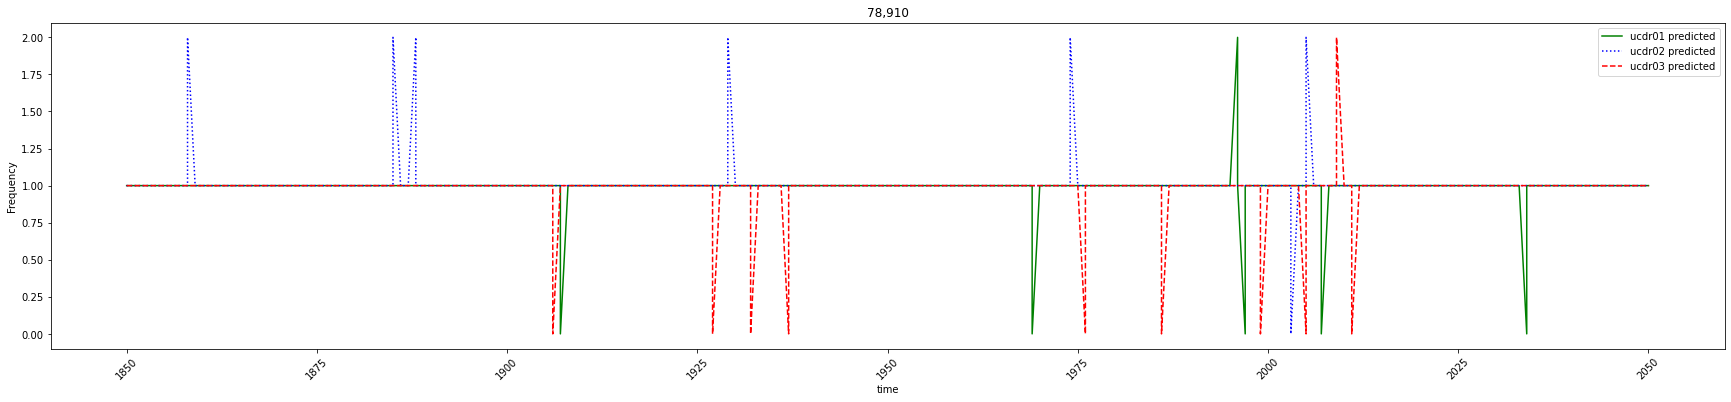

In [32]:
Y4 = pd.DataFrame(Y4)
Y4 = Y4.set_index(df5e["year"])
Y4a = Y4.iloc[range(0,401)]
Y4b = Y4.iloc[range(401,902)]

Y5 = pd.DataFrame(Y5)
Y5 = Y5.set_index(df6e["year"])
Y5a = Y5.iloc[range(0,401)]
Y5b = Y5.iloc[range(401,902)]

Y6 = pd.DataFrame(Y6)
Y6 = Y6.set_index(df7e["year"])
Y6a = Y6.iloc[range(0,401)]
Y6b = Y6.iloc[range(401,902)]

plt.figure(figsize=(30, 6))  

plt.plot(Y4a, color='green',linestyle = '-', label='ucdr01 predicted')
plt.plot(Y5a, color='blue',linestyle = ':', label='ucdr02 predicted')
plt.plot(Y6a, color='red',linestyle = '--', label='ucdr03 predicted')

plt.title('78,910')
plt.xlabel('time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()

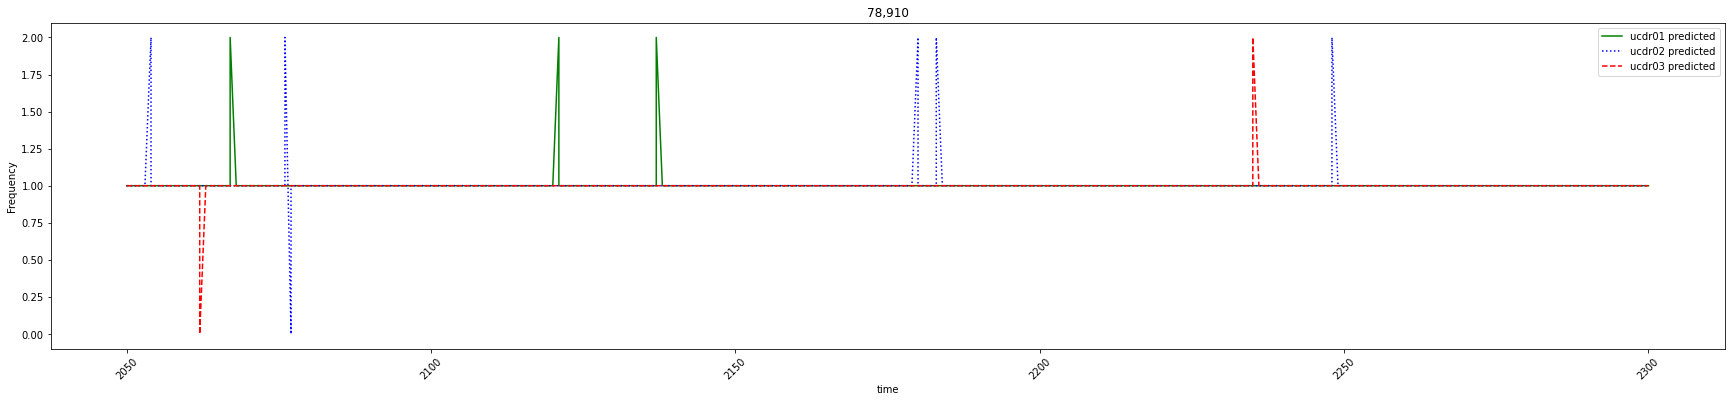

In [33]:
plt.figure(figsize=(30, 6))  

plt.plot(Y4b, color='green',linestyle = '-', label='ucdr01 predicted')
plt.plot(Y5b, color='blue',linestyle = ':', label='ucdr02 predicted')
plt.plot(Y6b, color='red',linestyle = '--', label='ucdr03 predicted')

plt.title('78,910')
plt.xlabel('time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Fig3 - ucdr01 + cdr08, ucdr02 + cdr08, ucdr03 + cdr10

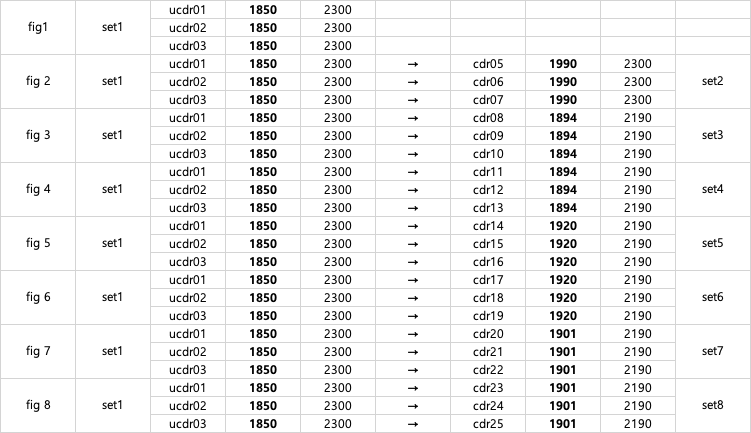

In [34]:
df11 = pd.read_csv('cdr08.csv')
df12 = pd.read_csv('cdr09.csv')
df13 = pd.read_csv('cdr10.csv')

df11 = df11[df11["mon"].isin([7,8,9,10])]
df11a = df11[df11["mon"].isin([7,8])]
df11b = df11[df11["mon"].isin([9,10])]
df11a = df11a.groupby(['year'], as_index=False).mean()
df11b = df11b.groupby(['year'], as_index=False).mean()
df11c = pd.concat([df11a,df11b])
df11c = df11c.sort_values(by=['year'],ascending = True)

In [35]:
df12 = df12[df12["mon"].isin([7,8,9,10])]
df12a = df12[df12["mon"].isin([7,8])]
df12b = df12[df12["mon"].isin([9,10])]
df12a = df12a.groupby(['year'], as_index=False).mean()
df12b = df12b.groupby(['year'], as_index=False).mean()
df12c = pd.concat([df12a,df12b])
df12c = df12c.sort_values(by=['year'],ascending = True)

In [38]:
df13 = df13[df13["mon"].isin([7,8,9,10])]
df13a = df13[df13["mon"].isin([7,8])]
df13b = df13[df13["mon"].isin([9,10])]
df13a = df13a.groupby(['year'], as_index=False).mean()
df13b = df13b.groupby(['year'], as_index=False).mean()
df13c = pd.concat([df13a,df13b])
df13c = df13c.sort_values(by=['year'],ascending = True)

In [62]:
df5d = df5c[df5c["year"].isin(list(range(1850,1894,1)))]
df11d = df11c[df11c["year"].isin(list(range(1894,2191,1)))]
df5e = pd.concat([df5d,df11d])
df5e = df5e.sort_values(by=['year'],ascending = True)
X7 = df5e.iloc[:,2:12]

In [63]:
df6d = df6c[df6c["year"].isin(list(range(1850,1894,1)))]
df12d = df12c[df12c["year"].isin(list(range(1894,2191,1)))]
df6e = pd.concat([df6d,df12d])
df6e = df6e.sort_values(by=['year'],ascending = True)
X8 = df6e.iloc[:,2:12]

In [64]:
df7d = df7c[df7c["year"].isin(list(range(1850,1894,1)))]
df13d = df13c[df13c["year"].isin(list(range(1894,2191,1)))]
df7e = pd.concat([df7d,df13d])
df7e = df7e.sort_values(by=['year'],ascending = True)
X9 = df7e.iloc[:,2:12]

In [82]:
Y7 = model5.predict(X7)
Y8 = model5.predict(X8)
Y9 = model5.predict(X9)

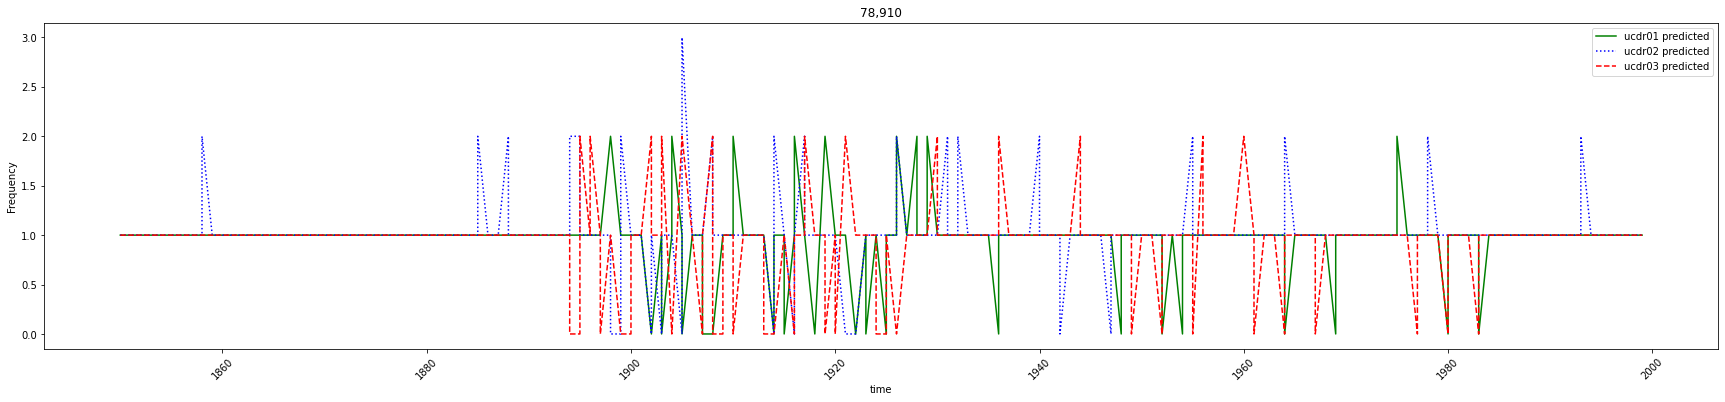

In [83]:
Y7 = pd.DataFrame(Y7)
Y7 = Y7.set_index(df5e["year"])
Y7a = Y7.iloc[range(0,300)]
Y7b = Y7.iloc[range(300,682)]

Y8 = pd.DataFrame(Y8)
Y8 = Y8.set_index(df6e["year"])
Y8a = Y8.iloc[range(0,300)]
Y8b = Y8.iloc[range(300,682)]

Y9 = pd.DataFrame(Y9)
Y9 = Y9.set_index(df7e["year"])
Y9a = Y9.iloc[range(0,300)]
Y9b = Y9.iloc[range(300,682)]

plt.figure(figsize=(30, 6))  

plt.plot(Y7a, color='green',linestyle = '-', label='ucdr01 predicted')
plt.plot(Y8a, color='blue',linestyle = ':', label='ucdr02 predicted')
plt.plot(Y9a, color='red',linestyle = '--', label='ucdr03 predicted')

plt.title('78,910')
plt.xlabel('time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()

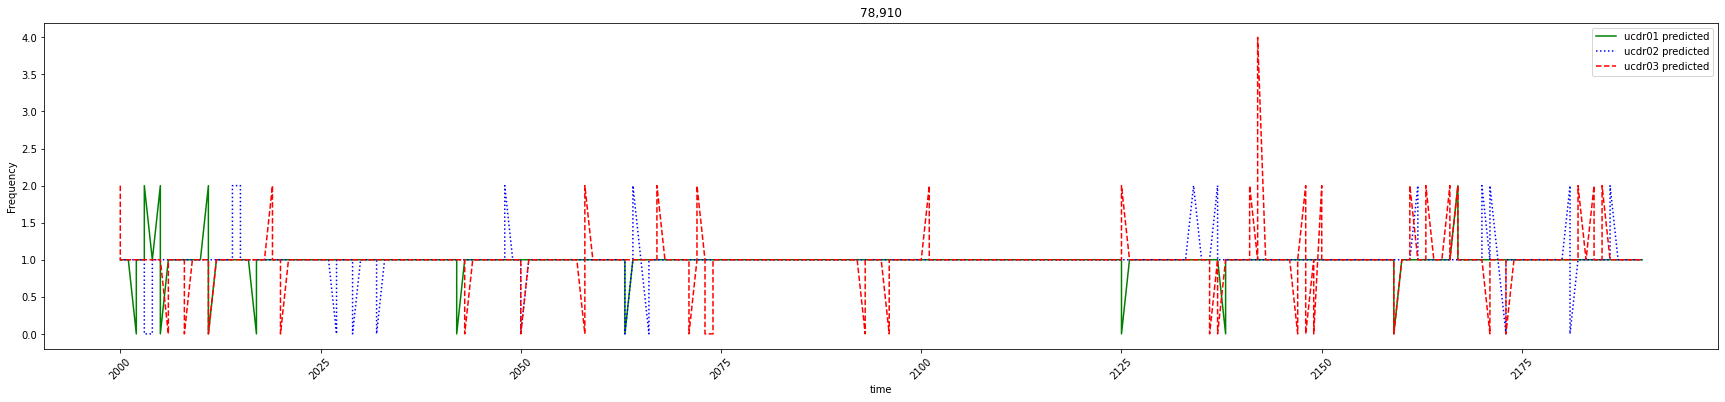

In [84]:
plt.figure(figsize=(30, 6))  

plt.plot(Y7b, color='green',linestyle = '-', label='ucdr01 predicted')
plt.plot(Y8b, color='blue',linestyle = ':', label='ucdr02 predicted')
plt.plot(Y9b, color='red',linestyle = '--', label='ucdr03 predicted')

plt.title('78,910')
plt.xlabel('time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Fig4 - ucdr01 + cdr11, ucdr02 + cdr12, ucdr03 + cdr13

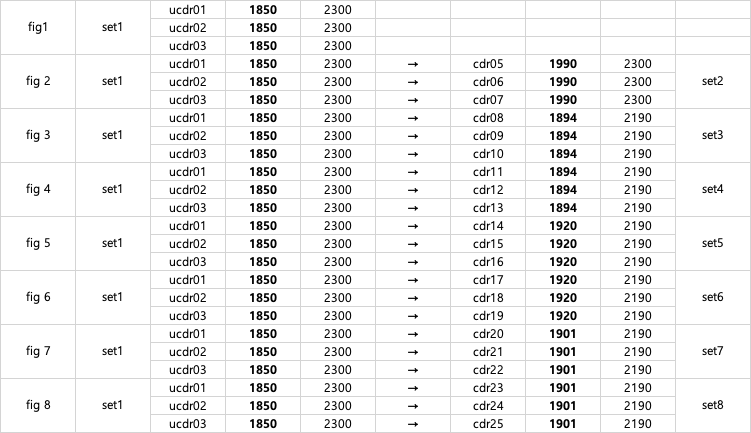

In [75]:
df14 = pd.read_csv('cdr11.csv')
df15 = pd.read_csv('cdr12.csv')
df16 = pd.read_csv('cdr13.csv')

df14 = df14[df14["mon"].isin([7,8,9,10])]
df14a = df14[df14["mon"].isin([7,8])]
df14b = df14[df14["mon"].isin([9,10])]
df14a = df14a.groupby(['year'], as_index=False).mean()
df14b = df14b.groupby(['year'], as_index=False).mean()
df14c = pd.concat([df14a,df14b])
df14c = df14c.sort_values(by=['year'],ascending = True)

In [76]:
df15 = df15[df15["mon"].isin([7,8,9,10])]
df15a = df15[df15["mon"].isin([7,8])]
df15b = df15[df15["mon"].isin([9,10])]
df15a = df15a.groupby(['year'], as_index=False).mean()
df15b = df15b.groupby(['year'], as_index=False).mean()
df15c = pd.concat([df15a,df15b])
df15c = df15c.sort_values(by=['year'],ascending = True)

In [77]:
df16 = df16[df16["mon"].isin([7,8,9,10])]
df16a = df16[df16["mon"].isin([7,8])]
df16b = df16[df16["mon"].isin([9,10])]
df16a = df16a.groupby(['year'], as_index=False).mean()
df16b = df16b.groupby(['year'], as_index=False).mean()
df16c = pd.concat([df16a,df16b])
df16c = df16c.sort_values(by=['year'],ascending = True)

In [78]:
df5d = df5c[df5c["year"].isin(list(range(1850,1894,1)))]
df14d = df14c[df14c["year"].isin(list(range(1894,2191,1)))]
df5e = pd.concat([df5d,df14d])
df5e = df5e.sort_values(by=['year'],ascending = True)
X10 = df5e.iloc[:,2:12]

In [79]:
df6d = df6c[df6c["year"].isin(list(range(1850,1894,1)))]
df15d = df15c[df15c["year"].isin(list(range(1894,2191,1)))]
df6e = pd.concat([df6d,df15d])
df6e = df6e.sort_values(by=['year'],ascending = True)
X11 = df6e.iloc[:,2:12]

In [80]:
df7d = df7c[df7c["year"].isin(list(range(1850,1894,1)))]
df16d = df16c[df16c["year"].isin(list(range(1894,2191,1)))]
df7e = pd.concat([df7d,df16d])
df7e = df7e.sort_values(by=['year'],ascending = True)
X12 = df7e.iloc[:,2:12]

In [85]:
Y10 = model5.predict(X10)
Y11 = model5.predict(X11)
Y12 = model5.predict(X12)

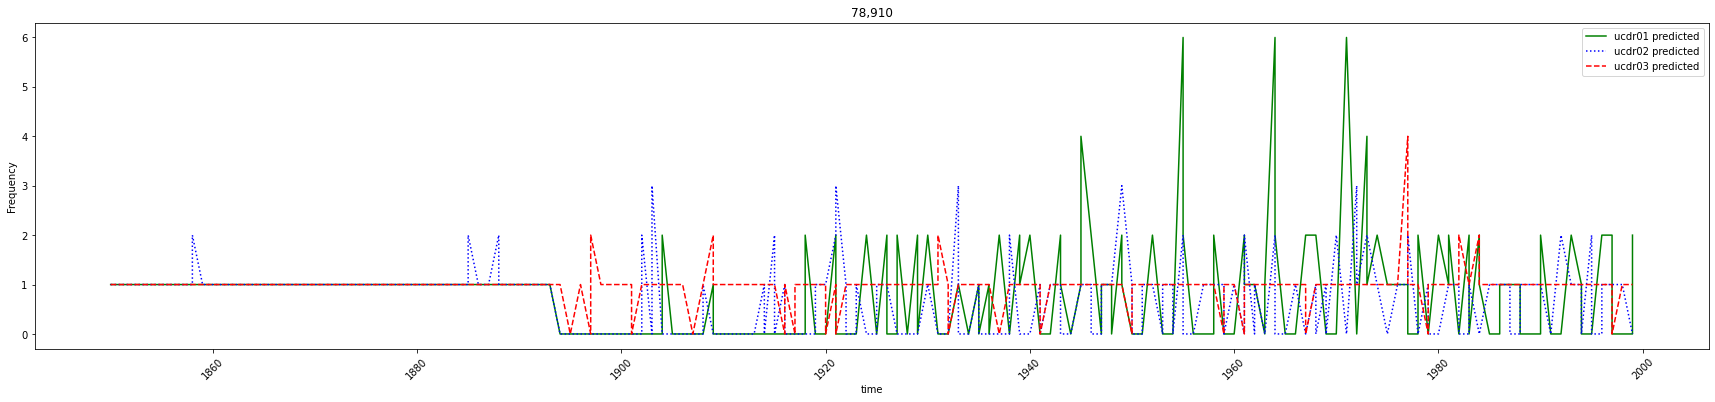

In [86]:
Y10 = pd.DataFrame(Y10)
Y10 = Y10.set_index(df5e["year"])
Y10a = Y10.iloc[range(0,300)]
Y10b = Y10.iloc[range(300,682)]

Y11 = pd.DataFrame(Y11)
Y11 = Y11.set_index(df6e["year"])
Y11a = Y11.iloc[range(0,300)]
Y11b = Y11.iloc[range(300,682)]

Y12 = pd.DataFrame(Y12)
Y12 = Y12.set_index(df7e["year"])
Y12a = Y12.iloc[range(0,300)]
Y12b = Y12.iloc[range(300,682)]

plt.figure(figsize=(30, 6))  

plt.plot(Y10a, color='green',linestyle = '-', label='ucdr01 predicted')
plt.plot(Y11a, color='blue',linestyle = ':', label='ucdr02 predicted')
plt.plot(Y12a, color='red',linestyle = '--', label='ucdr03 predicted')

plt.title('78,910')
plt.xlabel('time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()

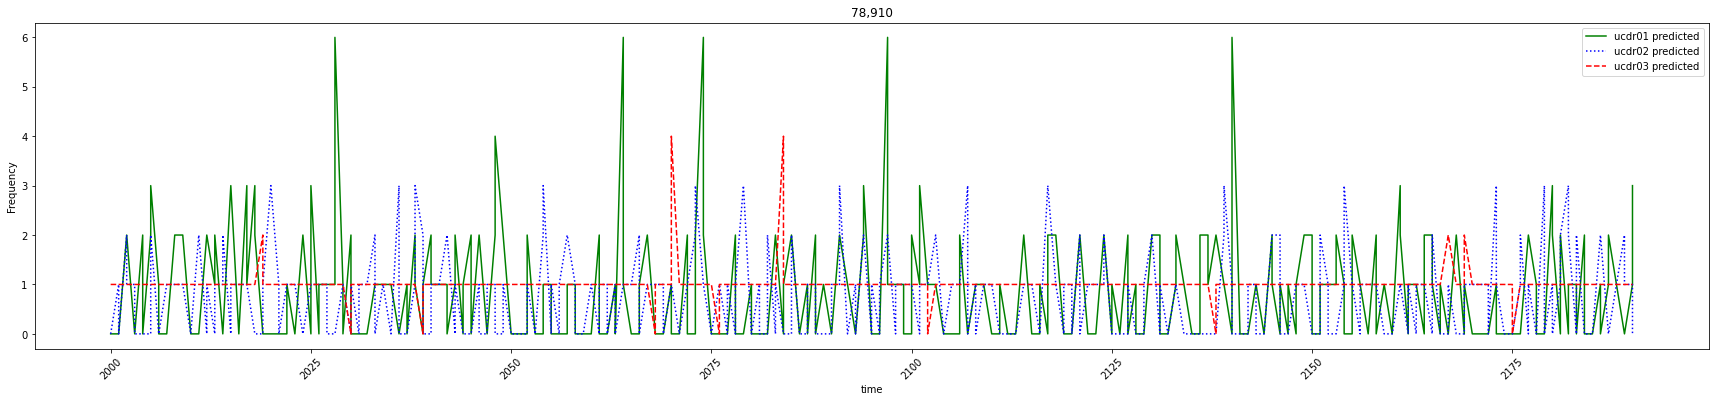

In [87]:
plt.figure(figsize=(30, 6))  

plt.plot(Y10b, color='green',linestyle = '-', label='ucdr01 predicted')
plt.plot(Y11b, color='blue',linestyle = ':', label='ucdr02 predicted')
plt.plot(Y12b, color='red',linestyle = '--', label='ucdr03 predicted')

plt.title('78,910')
plt.xlabel('time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Fig5 - ucdr01 + cdr14, ucdr02 + cdr15, ucdr03 + cdr16

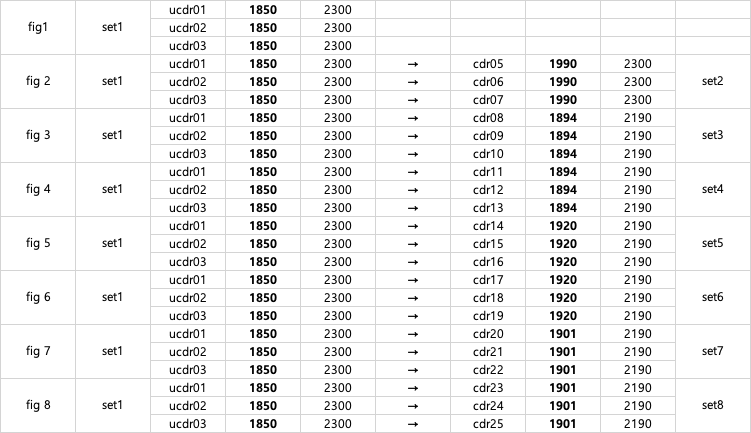

In [88]:
df17 = pd.read_csv('cdr14.csv')
df18 = pd.read_csv('cdr15.csv')
df19 = pd.read_csv('cdr16.csv')

df17 = df17[df17["mon"].isin([7,8,9,10])]
df17a = df17[df17["mon"].isin([7,8])]
df17b = df17[df17["mon"].isin([9,10])]
df17a = df17a.groupby(['year'], as_index=False).mean()
df17b = df17b.groupby(['year'], as_index=False).mean()
df17c = pd.concat([df17a,df17b])
df17c = df17c.sort_values(by=['year'],ascending = True)

In [89]:
df18 = df18[df18["mon"].isin([7,8,9,10])]
df18a = df18[df18["mon"].isin([7,8])]
df18b = df18[df18["mon"].isin([9,10])]
df18a = df18a.groupby(['year'], as_index=False).mean()
df18b = df18b.groupby(['year'], as_index=False).mean()
df18c = pd.concat([df18a,df18b])
df18c = df18c.sort_values(by=['year'],ascending = True)

In [90]:
df19 = df19[df19["mon"].isin([7,8,9,10])]
df19a = df19[df19["mon"].isin([7,8])]
df19b = df19[df19["mon"].isin([9,10])]
df19a = df19a.groupby(['year'], as_index=False).mean()
df19b = df19b.groupby(['year'], as_index=False).mean()
df19c = pd.concat([df19a,df19b])
df19c = df19c.sort_values(by=['year'],ascending = True)

In [91]:
df5d = df5c[df5c["year"].isin(list(range(1850,1894,1)))]
df17d = df17c[df17c["year"].isin(list(range(1894,2191,1)))]
df5e = pd.concat([df5d,df17d])
df5e = df5e.sort_values(by=['year'],ascending = True)
X13 = df5e.iloc[:,2:12]

In [92]:
df6d = df6c[df6c["year"].isin(list(range(1850,1894,1)))]
df18d = df18c[df18c["year"].isin(list(range(1894,2191,1)))]
df6e = pd.concat([df6d,df18d])
df6e = df6e.sort_values(by=['year'],ascending = True)
X14 = df6e.iloc[:,2:12]

In [93]:
df7d = df7c[df7c["year"].isin(list(range(1850,1894,1)))]
df19d = df19c[df19c["year"].isin(list(range(1894,2191,1)))]
df7e = pd.concat([df7d,df19d])
df7e = df7e.sort_values(by=['year'],ascending = True)
X15 = df7e.iloc[:,2:12]

In [94]:
Y13 = model5.predict(X13)
Y14 = model5.predict(X14)
Y15 = model5.predict(X15)

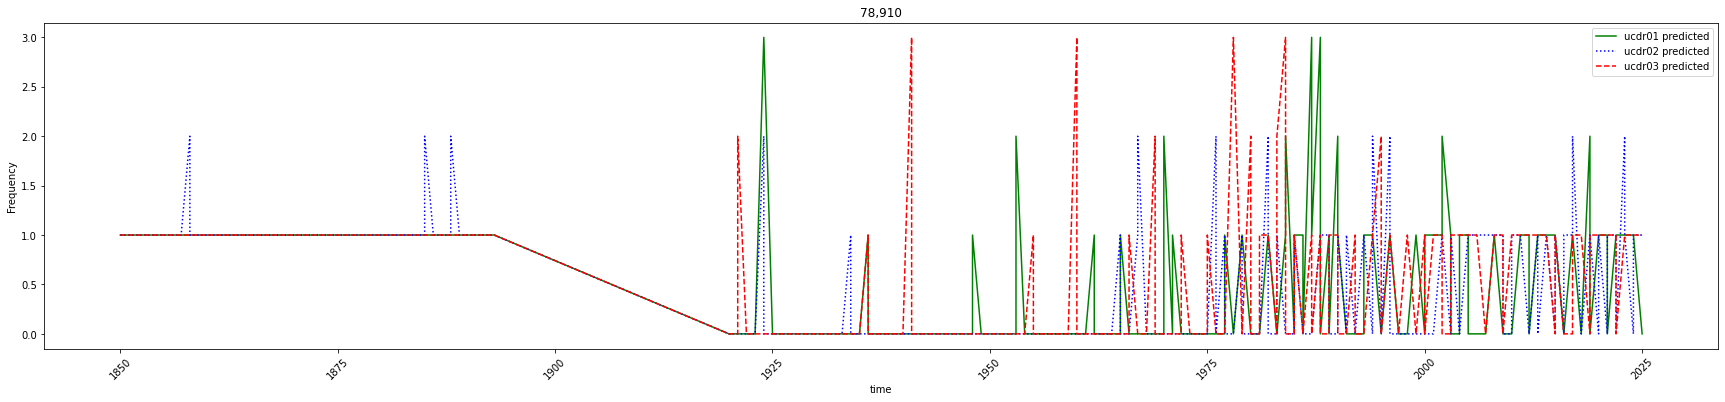

In [100]:
Y13 = pd.DataFrame(Y13)
Y13 = Y13.set_index(df5e["year"])
Y13a = Y13.iloc[range(0,300)]
Y13b = Y13.iloc[range(300,len(Y13))]

Y14 = pd.DataFrame(Y14)
Y14 = Y14.set_index(df6e["year"])
Y14a = Y14.iloc[range(0,300)]
Y14b = Y14.iloc[range(300,len(Y13))]

Y15 = pd.DataFrame(Y15)
Y15 = Y15.set_index(df7e["year"])
Y15a = Y15.iloc[range(0,300)]
Y15b = Y15.iloc[range(300,len(Y13))]

plt.figure(figsize=(30, 6))  

plt.plot(Y13a, color='green',linestyle = '-', label='ucdr01 predicted')
plt.plot(Y14a, color='blue',linestyle = ':', label='ucdr02 predicted')
plt.plot(Y15a, color='red',linestyle = '--', label='ucdr03 predicted')

plt.title('78,910')
plt.xlabel('time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()

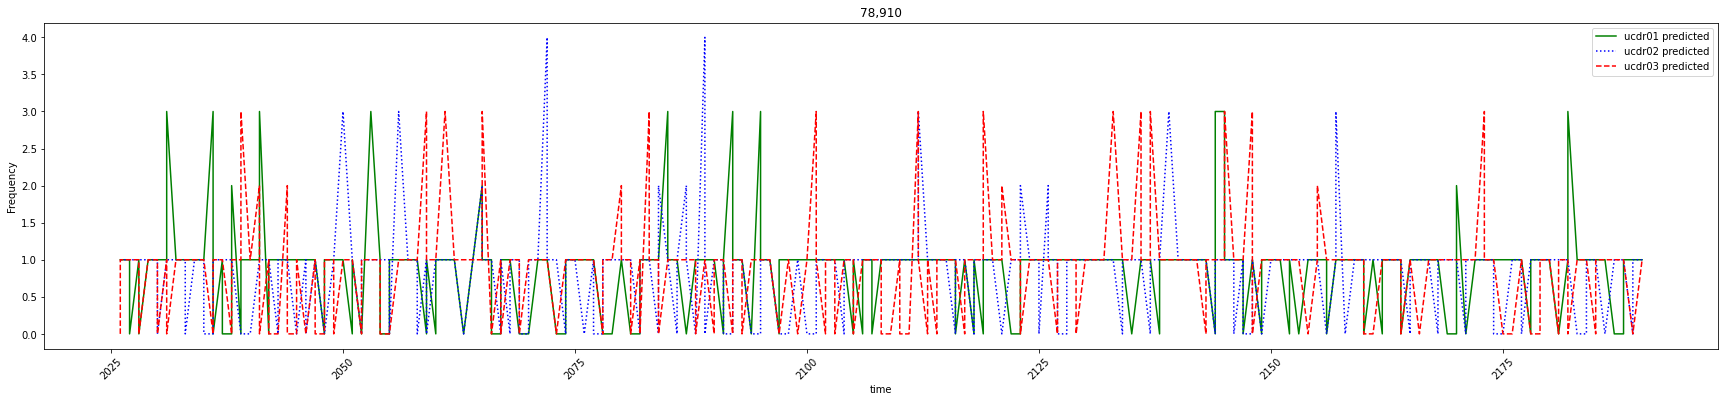

In [104]:
plt.figure(figsize=(30, 6))  

plt.plot(Y13b, color='green',linestyle = '-', label='ucdr01 predicted')
plt.plot(Y14b, color='blue',linestyle = ':', label='ucdr02 predicted')
plt.plot(Y15b, color='red',linestyle = '--', label='ucdr03 predicted')

plt.title('78,910')
plt.xlabel('time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Fig6 - ucdr01 + cdr17, ucdr02 + cdr18, ucdr03 + cdr19

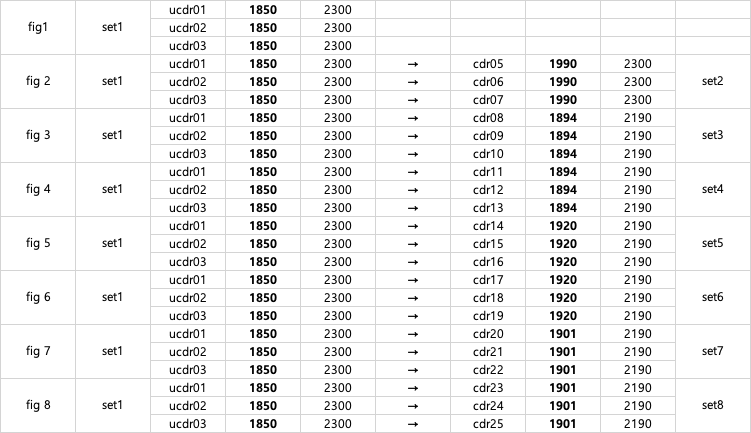

In [105]:
df20 = pd.read_csv('cdr17.csv')
df21 = pd.read_csv('cdr18.csv')
df22 = pd.read_csv('cdr19.csv')

df20 = df20[df20["mon"].isin([7,8,9,10])]
df20a = df20[df20["mon"].isin([7,8])]
df20b = df20[df20["mon"].isin([9,10])]
df20a = df20a.groupby(['year'], as_index=False).mean()
df20b = df20b.groupby(['year'], as_index=False).mean()
df20c = pd.concat([df20a,df20b])
df20c = df20c.sort_values(by=['year'],ascending = True)

In [106]:
df21 = df21[df21["mon"].isin([7,8,9,10])]
df21a = df21[df21["mon"].isin([7,8])]
df21b = df21[df21["mon"].isin([9,10])]
df21a = df21a.groupby(['year'], as_index=False).mean()
df21b = df21b.groupby(['year'], as_index=False).mean()
df21c = pd.concat([df21a,df21b])
df21c = df21c.sort_values(by=['year'],ascending = True)

In [107]:
df22 = df22[df22["mon"].isin([7,8,9,10])]
df22a = df22[df22["mon"].isin([7,8])]
df22b = df22[df22["mon"].isin([9,10])]
df22a = df22a.groupby(['year'], as_index=False).mean()
df22b = df22b.groupby(['year'], as_index=False).mean()
df22c = pd.concat([df22a,df22b])
df22c = df22c.sort_values(by=['year'],ascending = True)

In [108]:
df5d = df5c[df5c["year"].isin(list(range(1850,1894,1)))]
df20d = df20c[df20c["year"].isin(list(range(1894,2191,1)))]
df5e = pd.concat([df5d,df20d])
df5e = df5e.sort_values(by=['year'],ascending = True)
X16 = df5e.iloc[:,2:12]

In [109]:
df6d = df6c[df6c["year"].isin(list(range(1850,1894,1)))]
df21d = df21c[df21c["year"].isin(list(range(1894,2191,1)))]
df6e = pd.concat([df6d,df21d])
df6e = df6e.sort_values(by=['year'],ascending = True)
X17 = df6e.iloc[:,2:12]

In [110]:
df7d = df7c[df7c["year"].isin(list(range(1850,1894,1)))]
df22d = df22c[df22c["year"].isin(list(range(1894,2191,1)))]
df7e = pd.concat([df7d,df22d])
df7e = df7e.sort_values(by=['year'],ascending = True)
X18 = df7e.iloc[:,2:12]

In [111]:
Y16 = model5.predict(X16)
Y17 = model5.predict(X17)
Y18 = model5.predict(X18)

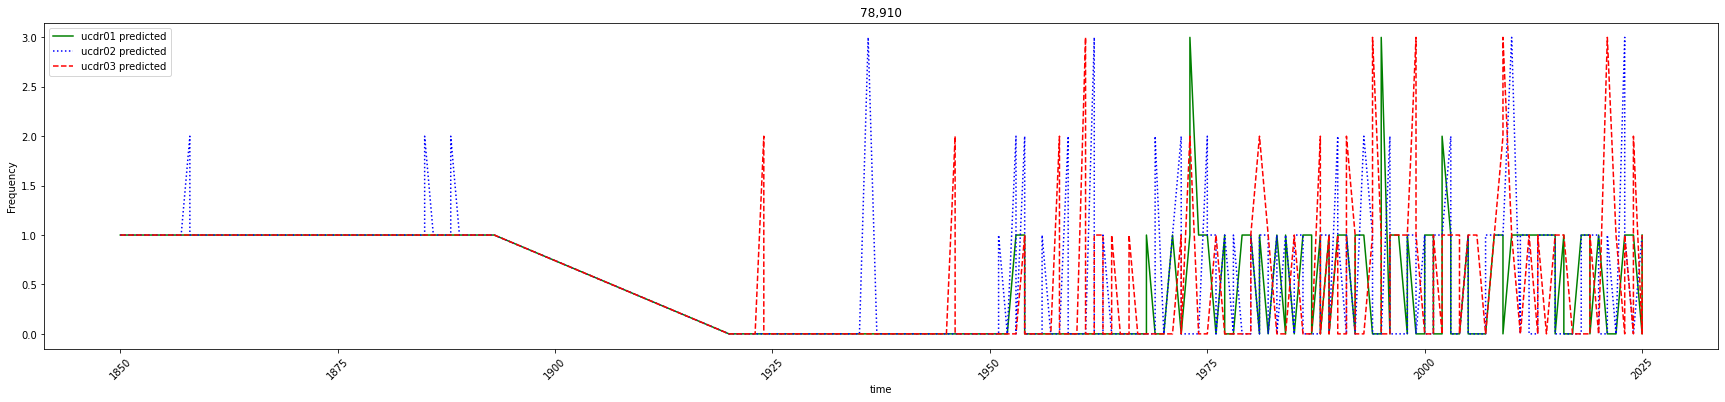

In [112]:
Y16 = pd.DataFrame(Y16)
Y16 = Y16.set_index(df5e["year"])
Y16a = Y16.iloc[range(0,300)]
Y16b = Y16.iloc[range(300,len(Y16))]

Y17 = pd.DataFrame(Y17)
Y17 = Y17.set_index(df6e["year"])
Y17a = Y17.iloc[range(0,300)]
Y17b = Y17.iloc[range(300,len(Y16))]

Y18 = pd.DataFrame(Y18)
Y18 = Y18.set_index(df7e["year"])
Y18a = Y18.iloc[range(0,300)]
Y18b = Y18.iloc[range(300,len(Y16))]

plt.figure(figsize=(30, 6))  

plt.plot(Y16a, color='green',linestyle = '-', label='ucdr01 predicted')
plt.plot(Y17a, color='blue',linestyle = ':', label='ucdr02 predicted')
plt.plot(Y18a, color='red',linestyle = '--', label='ucdr03 predicted')

plt.title('78,910')
plt.xlabel('time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()

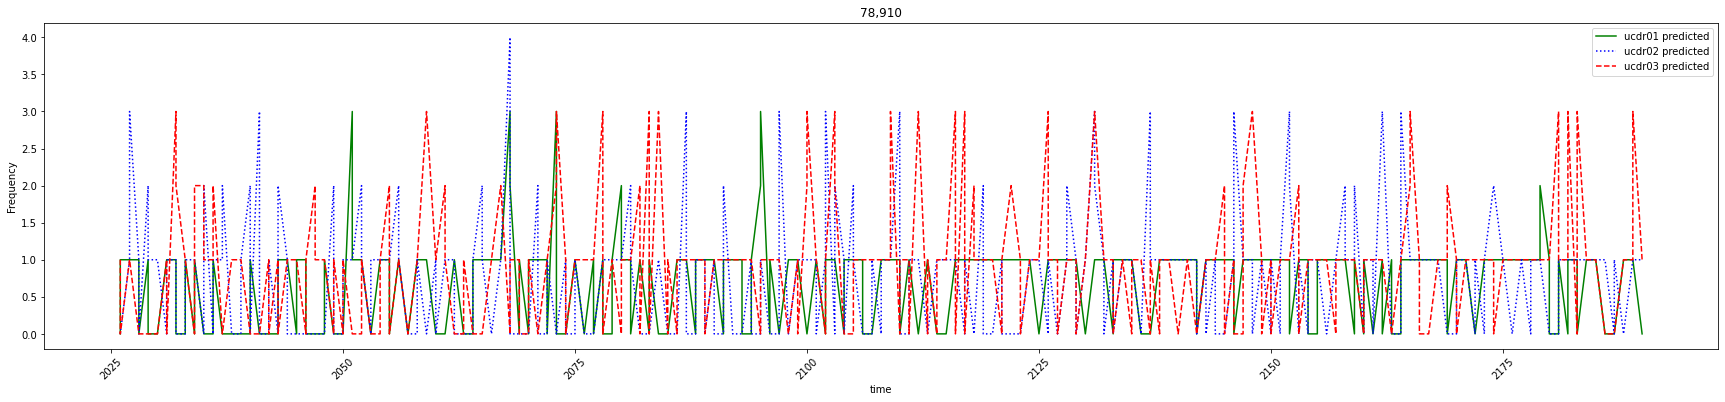

In [114]:
plt.figure(figsize=(30, 6))  

plt.plot(Y16b, color='green',linestyle = '-', label='ucdr01 predicted')
plt.plot(Y17b, color='blue',linestyle = ':', label='ucdr02 predicted')
plt.plot(Y18b, color='red',linestyle = '--', label='ucdr03 predicted')

plt.title('78,910')
plt.xlabel('time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Fig7 - ucdr01 + cdr20, ucdr02 + cdr21, ucdr03 + cdr22

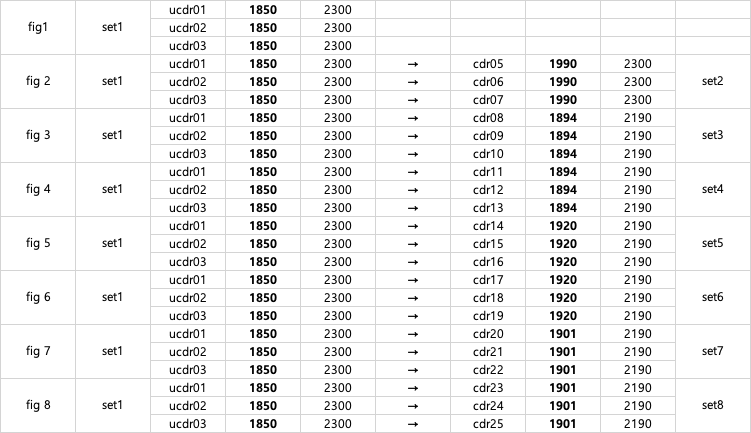

In [115]:
df23 = pd.read_csv('cdr20.csv')
df24 = pd.read_csv('cdr21.csv')
df25 = pd.read_csv('cdr22.csv')

df23 = df23[df23["mon"].isin([7,8,9,10])]
df23a = df23[df23["mon"].isin([7,8])]
df23b = df23[df23["mon"].isin([9,10])]
df23a = df23a.groupby(['year'], as_index=False).mean()
df23b = df23b.groupby(['year'], as_index=False).mean()
df23c = pd.concat([df23a,df23b])
df23c = df23c.sort_values(by=['year'],ascending = True)

In [116]:
df24 = df24[df24["mon"].isin([7,8,9,10])]
df24a = df24[df24["mon"].isin([7,8])]
df24b = df24[df24["mon"].isin([9,10])]
df24a = df24a.groupby(['year'], as_index=False).mean()
df24b = df24b.groupby(['year'], as_index=False).mean()
df24c = pd.concat([df24a,df24b])
df24c = df24c.sort_values(by=['year'],ascending = True)

In [117]:
df25 = df25[df25["mon"].isin([7,8,9,10])]
df25a = df25[df25["mon"].isin([7,8])]
df25b = df25[df25["mon"].isin([9,10])]
df25a = df25a.groupby(['year'], as_index=False).mean()
df25b = df25b.groupby(['year'], as_index=False).mean()
df25c = pd.concat([df25a,df25b])
df25c = df25c.sort_values(by=['year'],ascending = True)

In [118]:
df5d = df5c[df5c["year"].isin(list(range(1850,1894,1)))]
df23d = df23c[df23c["year"].isin(list(range(1894,2191,1)))]
df5e = pd.concat([df5d,df23d])
df5e = df5e.sort_values(by=['year'],ascending = True)
X19 = df5e.iloc[:,2:12]

In [119]:
df6d = df6c[df6c["year"].isin(list(range(1850,1894,1)))]
df24d = df24c[df24c["year"].isin(list(range(1894,2191,1)))]
df6e = pd.concat([df6d,df24d])
df6e = df6e.sort_values(by=['year'],ascending = True)
X20 = df6e.iloc[:,2:12]

In [120]:
df7d = df7c[df7c["year"].isin(list(range(1850,1894,1)))]
df25d = df25c[df25c["year"].isin(list(range(1894,2191,1)))]
df7e = pd.concat([df7d,df25d])
df7e = df7e.sort_values(by=['year'],ascending = True)
X21 = df7e.iloc[:,2:12]

In [121]:
Y19 = model5.predict(X19)
Y20 = model5.predict(X20)
Y21 = model5.predict(X21)

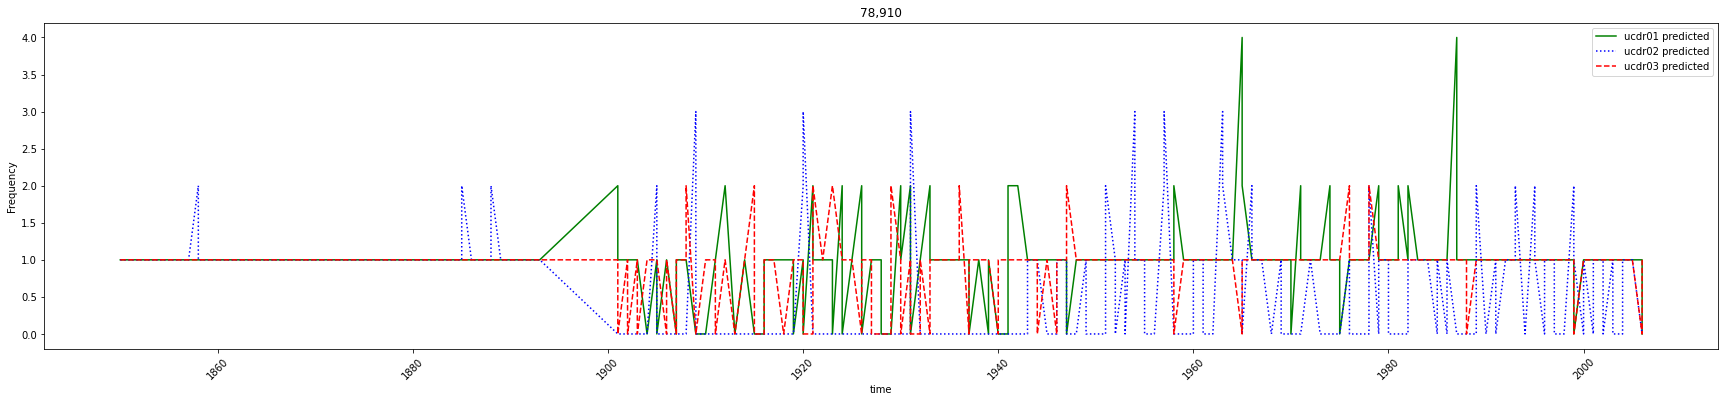

In [122]:
Y19 = pd.DataFrame(Y19)
Y19 = Y19.set_index(df5e["year"])
Y19a = Y19.iloc[range(0,300)]
Y19b = Y19.iloc[range(300,len(Y19))]

Y20 = pd.DataFrame(Y20)
Y20 = Y20.set_index(df6e["year"])
Y20a = Y20.iloc[range(0,300)]
Y20b = Y20.iloc[range(300,len(Y19))]

Y21 = pd.DataFrame(Y21)
Y21 = Y21.set_index(df7e["year"])
Y21a = Y21.iloc[range(0,300)]
Y21b = Y21.iloc[range(300,len(Y19))]

plt.figure(figsize=(30, 6))  

plt.plot(Y19a, color='green',linestyle = '-', label='ucdr01 predicted')
plt.plot(Y20a, color='blue',linestyle = ':', label='ucdr02 predicted')
plt.plot(Y21a, color='red',linestyle = '--', label='ucdr03 predicted')

plt.title('78,910')
plt.xlabel('time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()

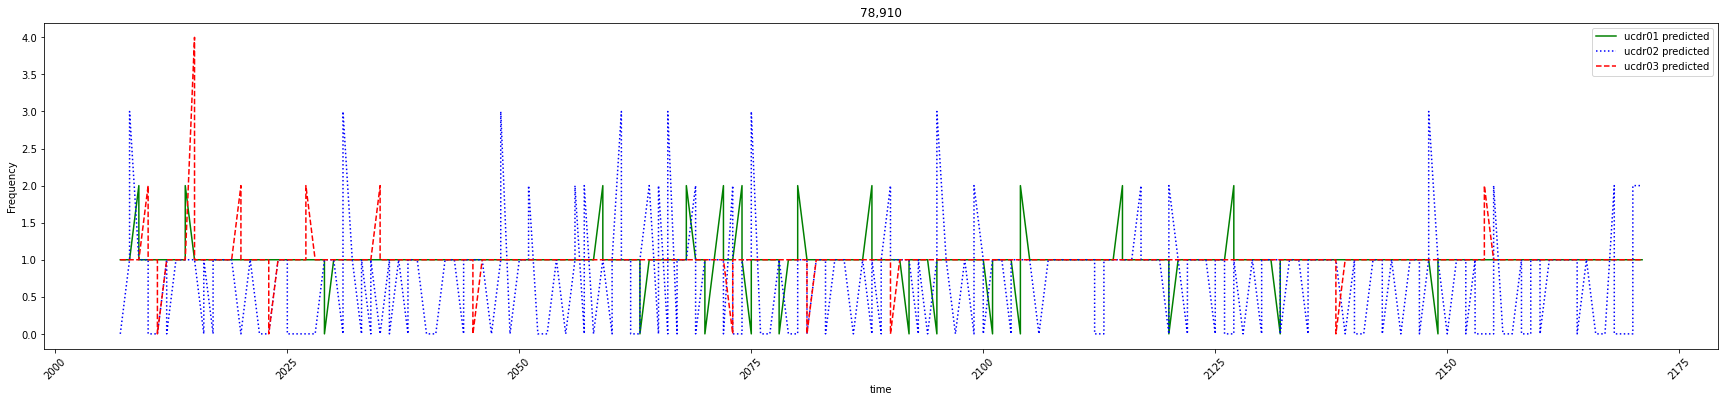

In [123]:
plt.figure(figsize=(30, 6))  

plt.plot(Y19b, color='green',linestyle = '-', label='ucdr01 predicted')
plt.plot(Y20b, color='blue',linestyle = ':', label='ucdr02 predicted')
plt.plot(Y21b, color='red',linestyle = '--', label='ucdr03 predicted')

plt.title('78,910')
plt.xlabel('time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Fig8 - ucdr01 + cdr23, ucdr02 + cdr24, ucdr03 + cdr25

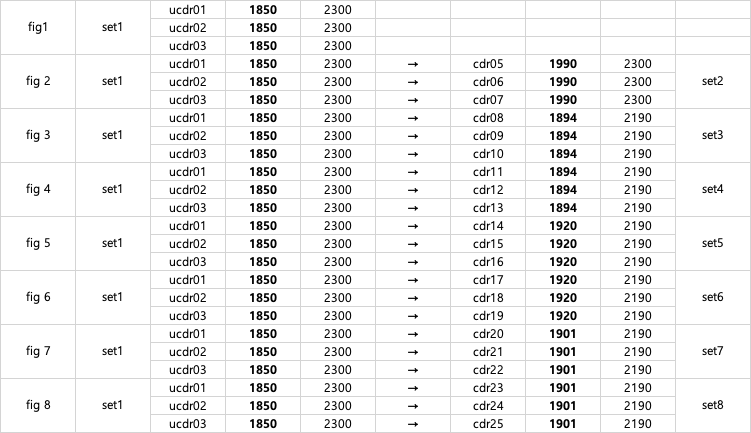

In [124]:
df26 = pd.read_csv('cdr23.csv')
df27 = pd.read_csv('cdr24.csv')
df28 = pd.read_csv('cdr25.csv')

df26 = df26[df26["mon"].isin([7,8,9,10])]
df26a = df26[df26["mon"].isin([7,8])]
df26b = df26[df26["mon"].isin([9,10])]
df26a = df26a.groupby(['year'], as_index=False).mean()
df26b = df26b.groupby(['year'], as_index=False).mean()
df26c = pd.concat([df26a,df26b])
df26c = df26c.sort_values(by=['year'],ascending = True)

In [125]:
df27 = df27[df27["mon"].isin([7,8,9,10])]
df27a = df27[df27["mon"].isin([7,8])]
df27b = df27[df27["mon"].isin([9,10])]
df27a = df27a.groupby(['year'], as_index=False).mean()
df27b = df27b.groupby(['year'], as_index=False).mean()
df27c = pd.concat([df27a,df27b])
df27c = df27c.sort_values(by=['year'],ascending = True)

In [126]:
df28 = df28[df28["mon"].isin([7,8,9,10])]
df28a = df28[df28["mon"].isin([7,8])]
df28b = df28[df28["mon"].isin([9,10])]
df28a = df28a.groupby(['year'], as_index=False).mean()
df28b = df28b.groupby(['year'], as_index=False).mean()
df28c = pd.concat([df28a,df28b])
df28c = df28c.sort_values(by=['year'],ascending = True)

In [127]:
df5d = df5c[df5c["year"].isin(list(range(1850,1894,1)))]
df26d = df26c[df26c["year"].isin(list(range(1894,2191,1)))]
df5e = pd.concat([df5d,df26d])
df5e = df5e.sort_values(by=['year'],ascending = True)
X22 = df5e.iloc[:,2:12]

In [128]:
df6d = df6c[df6c["year"].isin(list(range(1850,1894,1)))]
df27d = df27c[df27c["year"].isin(list(range(1894,2191,1)))]
df6e = pd.concat([df6d,df27d])
df6e = df6e.sort_values(by=['year'],ascending = True)
X23 = df6e.iloc[:,2:12]

In [129]:
df7d = df7c[df7c["year"].isin(list(range(1850,1894,1)))]
df28d = df28c[df28c["year"].isin(list(range(1894,2191,1)))]
df7e = pd.concat([df7d,df28d])
df7e = df7e.sort_values(by=['year'],ascending = True)
X24 = df7e.iloc[:,2:12]

In [130]:
Y22 = model5.predict(X22)
Y23 = model5.predict(X23)
Y24 = model5.predict(X24)

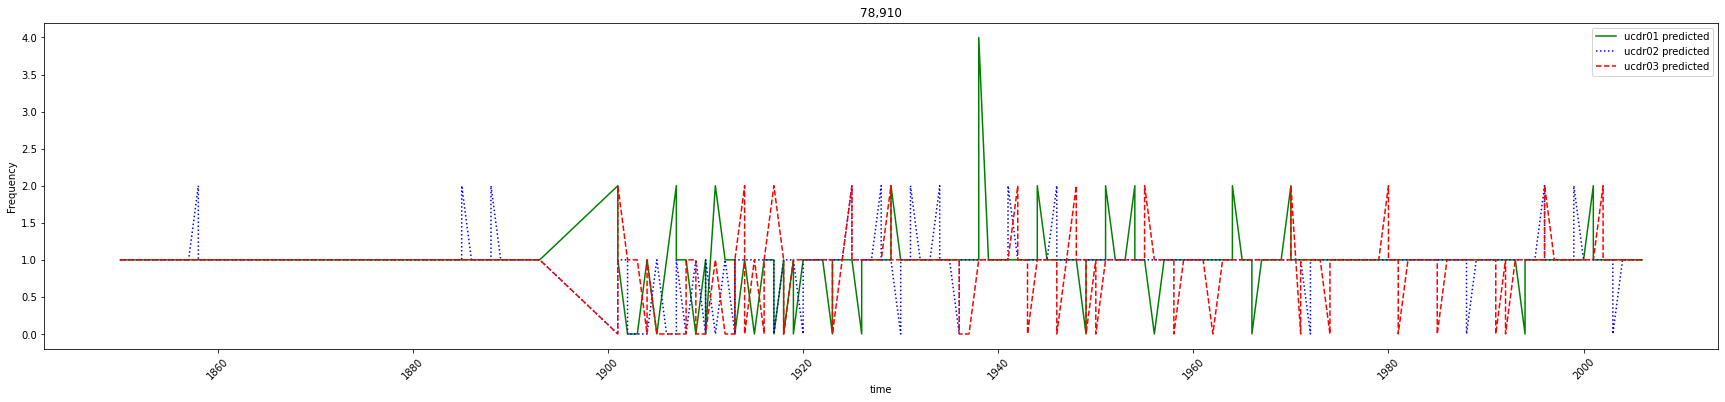

In [131]:
Y22 = pd.DataFrame(Y22)
Y22 = Y22.set_index(df5e["year"])
Y22a = Y22.iloc[range(0,300)]
Y22b = Y22.iloc[range(300,len(Y22))]

Y23 = pd.DataFrame(Y23)
Y23 = Y23.set_index(df6e["year"])
Y23a = Y23.iloc[range(0,300)]
Y23b = Y23.iloc[range(300,len(Y22))]

Y24 = pd.DataFrame(Y24)
Y24 = Y24.set_index(df7e["year"])
Y24a = Y24.iloc[range(0,300)]
Y24b = Y24.iloc[range(300,len(Y22))]

plt.figure(figsize=(30, 6))  

plt.plot(Y22a, color='green',linestyle = '-', label='ucdr01 predicted')
plt.plot(Y23a, color='blue',linestyle = ':', label='ucdr02 predicted')
plt.plot(Y24a, color='red',linestyle = '--', label='ucdr03 predicted')

plt.title('78,910')
plt.xlabel('time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()

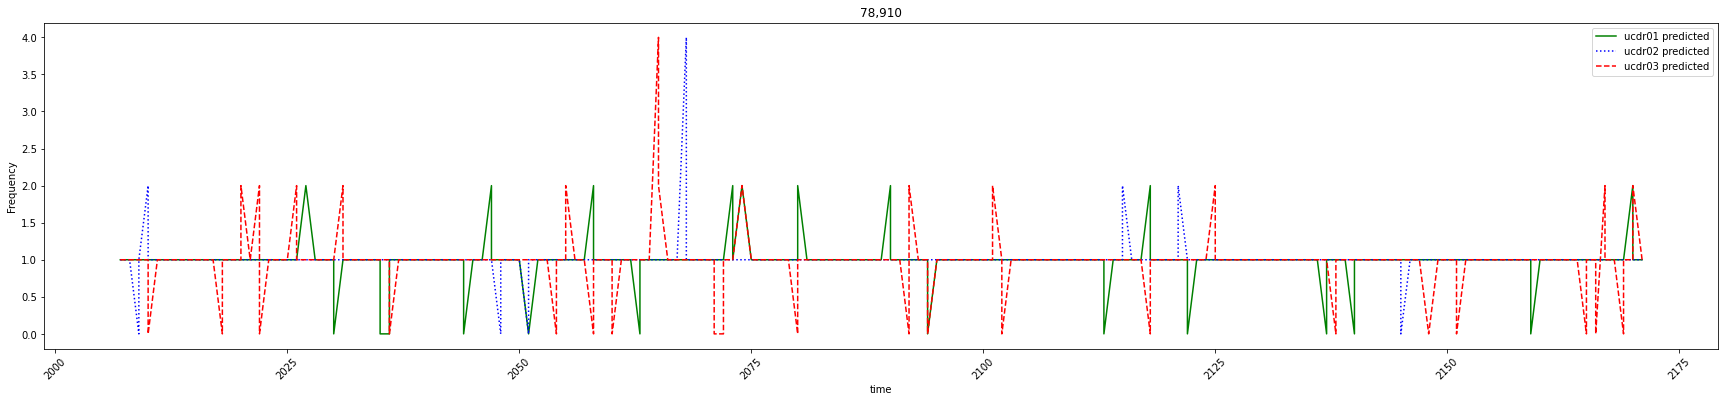

In [132]:
plt.figure(figsize=(30, 6))  

plt.plot(Y22b, color='green',linestyle = '-', label='ucdr01 predicted')
plt.plot(Y23b, color='blue',linestyle = ':', label='ucdr02 predicted')
plt.plot(Y24b, color='red',linestyle = '--', label='ucdr03 predicted')

plt.title('78,910')
plt.xlabel('time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()